In [2]:
pip install finterstellar

     |████████████████████████████████| 109 kB 3.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import finterstellar as fs

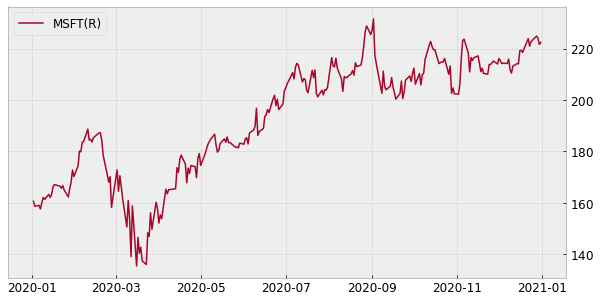

In [ ]:
symbol = 'MSFT' # 마이크로소프트 주식
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31') # 20년 1월 1일 ~ 20년 12월 31일
fs.draw_chart(df, right=symbol) # 차트 그리기

In [ ]:
# MACD 를 구하기 위해 macd() 내장 함수 사용
fs.macd(df)

Symbols,MSFT,macd,macd_signal,macd_oscillator
Date,,,,
2020-01-02,160.62,0.00,0.00,0.00
2020-01-03,158.62,-0.04,-0.02,-0.02
2020-01-06,159.03,-0.04,-0.03,-0.01
2020-01-07,157.58,-0.10,-0.05,-0.05
2020-01-08,160.09,-0.02,-0.04,0.02
...,...,...,...,...
2020-12-24,222.75,2.24,1.37,0.87
2020-12-28,224.96,2.55,1.61,0.94
2020-12-29,224.15,2.69,1.82,0.87


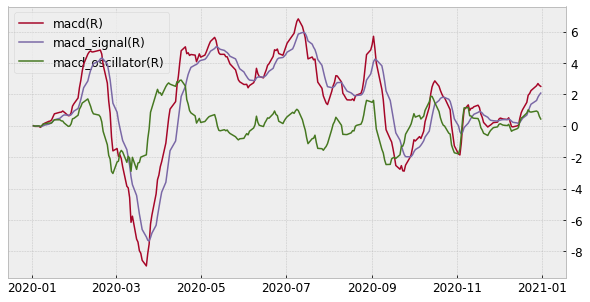

In [ ]:
# macd() 함수를 사용하니 macd, macd_signal, macd_oscillator columns가 추가되었다.
# 이 지표들을 차트로 그려보자.
fs.draw_chart(df, right=['macd', 'macd_signal', 'macd_oscillator'])

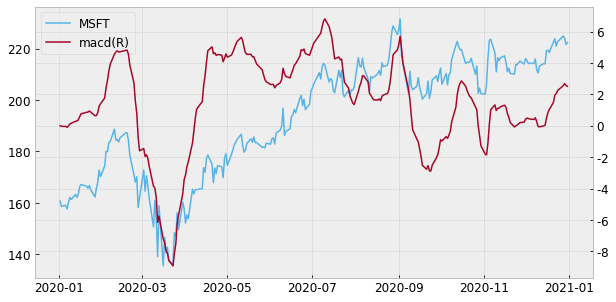

In [ ]:
# 실제 주가(하늘색)와 다양한 MACD 지표 비교
fs.draw_chart(df, right=['macd'], left=['MSFT'])

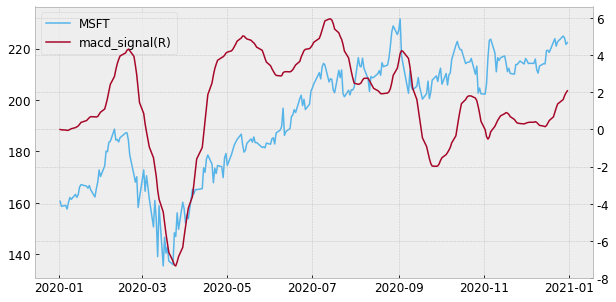

In [ ]:
# 실제 주가(하늘색)와 다양한 MACD 지표 비교
fs.draw_chart(df, right=['macd_signal'], left=['MSFT'])

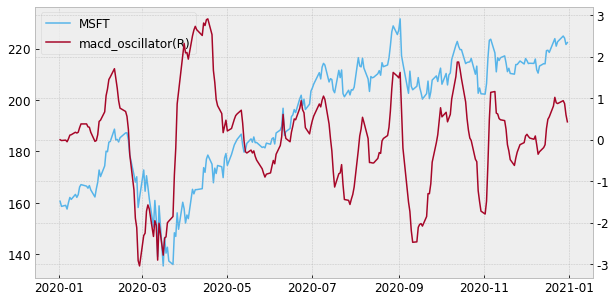

In [ ]:
# 실제 주가(하늘색)와 다양한 MACD 지표 비교
fs.draw_chart(df, right=['macd_oscillator'], left=['MSFT'])

In [ ]:
# MACD Oscillator가 0 이상인 경우 매수(sell)
# MACD Oscillator가 0 이하인 경우 매도(zero)
fs.indicator_to_signal(df, factor='macd_oscillator', buy=0, sell=0)

Date
2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08     buy
              ... 
2020-12-24     buy
2020-12-28     buy
2020-12-29     buy
2020-12-30     buy
2020-12-31     buy
Name: trade, Length: 253, dtype: object

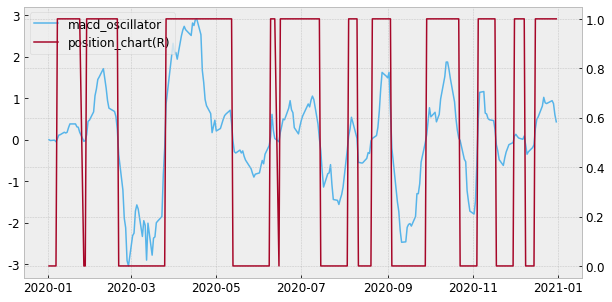

In [ ]:
fs.position(df)
fs.draw_chart(df, right='position_chart', left='macd_oscillator')

CAGR: 23.49%
Accumulated return: 23.49%
Average return: 2.15%
Benchmark return : 38.48%
Number of trades: 11
Number of win: 6
Hit ratio: 54.55%
Investment period: 1.0yrs
Sharpe ratio: 0.77
MDD: -11.28%
Benchmark MDD: -28.24%


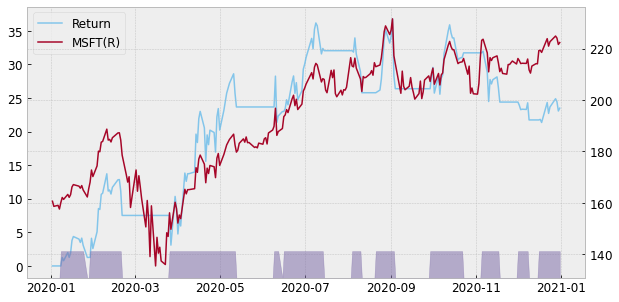

In [ ]:
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
import finterstellar as fs

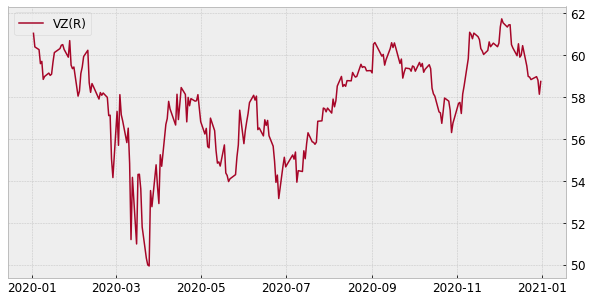

In [ ]:
symbol = 'VZ' # 버라이즌
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

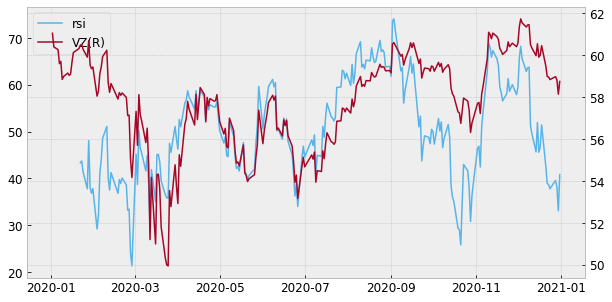

In [ ]:
fs.rsi(df, w=14)
fs.draw_chart(df, left='rsi', right=symbol)

CAGR: 7.22%
Accumulated return: 6.80%
Average return: 4.17%
Benchmark return : -2.86%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.21
MDD: -17.10%
Benchmark MDD: -18.20%


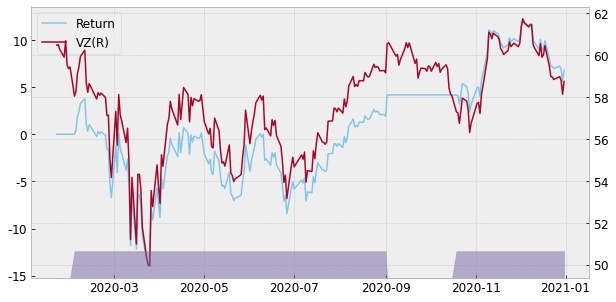

In [ ]:
fs.indicator_to_signal(df, factor='rsi', buy=30, sell=70) # 평균 회귀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: -2.94%
Accumulated return: -2.77%
Average return: -2.77%
Benchmark return : -2.86%
Number of trades: 1
Number of win: 0
Hit ratio: 0.00%
Investment period: 0.9yrs
Sharpe ratio: -1.17
MDD: -2.90%
Benchmark MDD: -17.73%


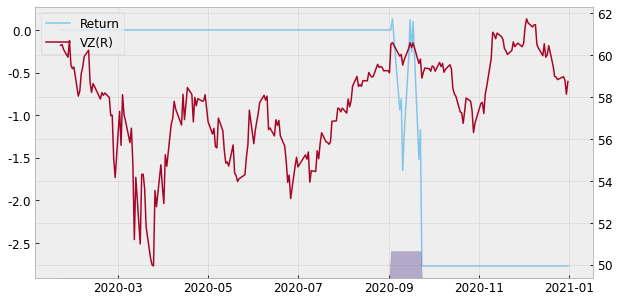

In [ ]:
fs.indicator_to_signal(df, factor='rsi', buy=70, sell=50) # 모멘텀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [3]:
import finterstellar as fs

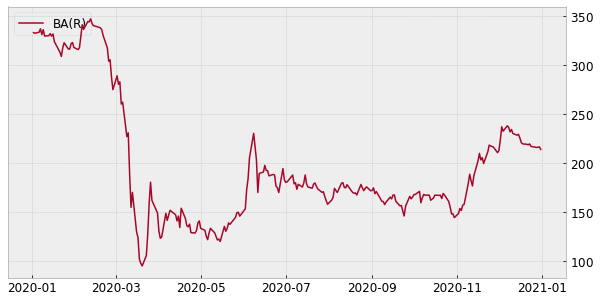

In [4]:
symbol = 'BA'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

In [5]:
fs.envelope(df, w=20, spread=.1)
df.tail()

Symbols,BA,center,ub,lb
Date,,,,
2020-12-24,217.15,225.27,247.80,202.75
2020-12-28,216.09,225.25,247.78,202.73
2020-12-29,216.25,225.53,248.08,202.98
2020-12-30,216.67,225.71,248.28,203.14
2020-12-31,214.06,225.22,247.74,202.70


In [6]:
fs.band_to_signal(df, buy='A', sell='B') # 엔벨로프-모멘텀 전략

Date
2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08    zero
              ... 
2020-12-24    zero
2020-12-28    zero
2020-12-29    zero
2020-12-30    zero
2020-12-31    zero
Name: trade, Length: 253, dtype: object

CAGR: 38.38%
Accumulated return: 35.33%
Average return: 5.58%
Benchmark return : -33.79%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: 0.88
MDD: -26.49%
Benchmark MDD: -72.66%


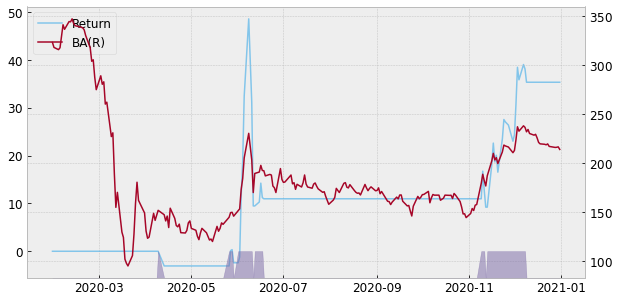

In [7]:
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: -22.11%
Accumulated return: -20.35%
Average return: -0.36%
Benchmark return : -33.79%
Number of trades: 4
Number of win: 3
Hit ratio: 75.00%
Investment period: 0.9yrs
Sharpe ratio: -0.27
MDD: -67.16%
Benchmark MDD: -72.66%


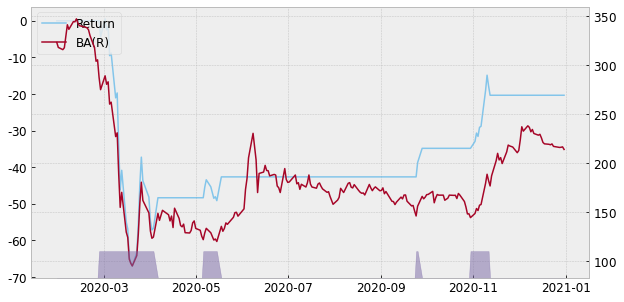

In [8]:
fs.band_to_signal(df, buy='D', sell='B') # 엔벨로프-평균회귀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [9]:
import finterstellar as fs

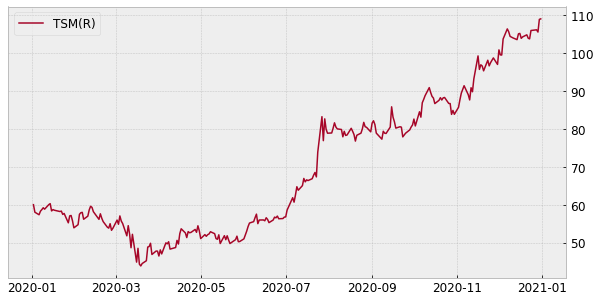

In [10]:
symbol = 'TSM'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

In [11]:
fs.bollinger(df, w=20, k=2) # BB(20, 2)
df.tail()

Symbols,TSM,center,sigma,ub,lb
Date,,,,,
2020-12-24,105.97,103.23,2.62,108.48,97.98
2020-12-28,106.15,103.60,2.48,108.55,98.65
2020-12-29,105.56,104.03,1.96,107.96,100.10
2020-12-30,108.90,104.43,2.10,108.63,100.23
2020-12-31,109.04,104.91,2.01,108.92,100.89


CAGR: 9.12%
Accumulated return: 8.40%
Average return: 0.86%
Benchmark return : 95.41%
Number of trades: 11
Number of win: 5
Hit ratio: 45.45%
Investment period: 0.9yrs
Sharpe ratio: 0.32
MDD: -13.76%
Benchmark MDD: -27.24%


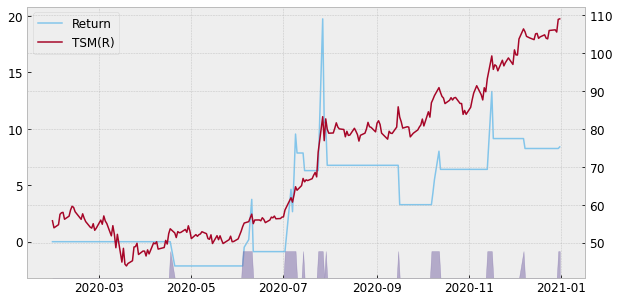

In [13]:
fs.band_to_signal(df, buy='A', sell='B') # 모멘텀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: 15.37%
Accumulated return: 14.15%
Average return: 4.53%
Benchmark return : 95.41%
Number of trades: 3
Number of win: 3
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 0.46
MDD: -15.97%
Benchmark MDD: -26.40%


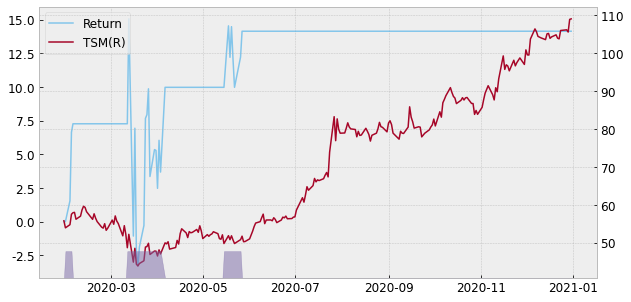

In [14]:
fs.band_to_signal(df, buy='D', sell='B') # 평균회귀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

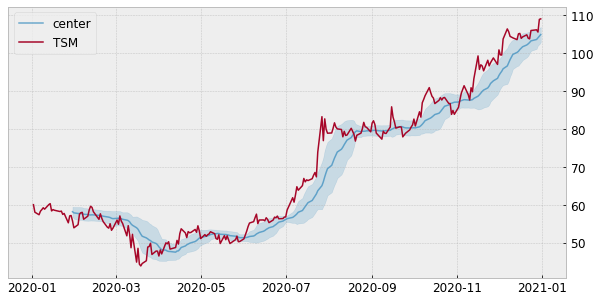

In [15]:
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.bollinger(df, w=20, k=1) # BB(20, 1)
fs.draw_band_chart(df)

CAGR: 21.69%
Accumulated return: 19.97%
Average return: 1.27%
Benchmark return : 95.41%
Number of trades: 20
Number of win: 5
Hit ratio: 25.00%
Investment period: 0.9yrs
Sharpe ratio: 0.60
MDD: -14.60%
Benchmark MDD: -27.24%


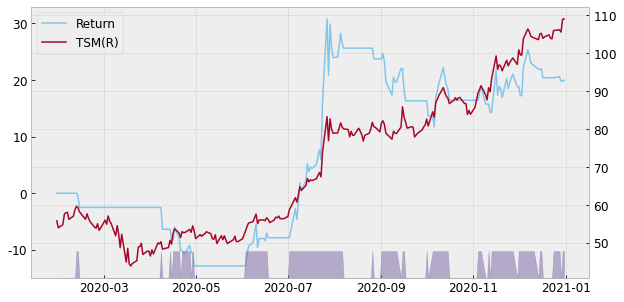

In [17]:
fs.band_to_signal(df, buy='A', sell='B') # 모멘텀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: 35.70%
Accumulated return: 32.86%
Average return: 2.75%
Benchmark return : 95.41%
Number of trades: 8
Number of win: 7
Hit ratio: 87.50%
Investment period: 0.9yrs
Sharpe ratio: 0.96
MDD: -19.48%
Benchmark MDD: -26.40%


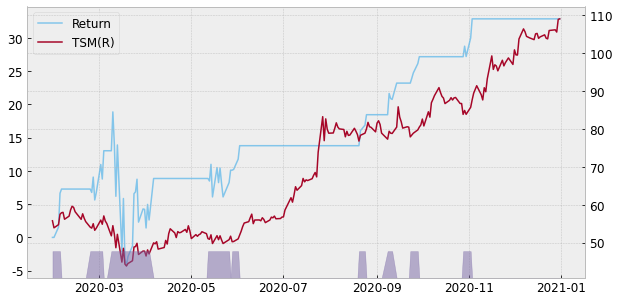

In [18]:
fs.band_to_signal(df, buy='D', sell='B') # 평균회귀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [19]:
# 모멘텀 전략과 평균회귀 전략을 섞어보자
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
df = fs.bollinger(df, w=20, k=1)
df['s1'] = fs.band_to_signal(df, buy='A', sell='B') # 모멘텀 전략
df['s2'] = fs.band_to_signal(df, buy='D', sell='B') # 평균회귀 전략

CAGR: 30.88%
Accumulated return: 28.43%
Average return: 2.85%
Benchmark return : 95.41%
Number of trades: 9
Number of win: 8
Hit ratio: 88.89%
Investment period: 0.9yrs
Sharpe ratio: 0.82
MDD: -19.48%
Benchmark MDD: -27.24%


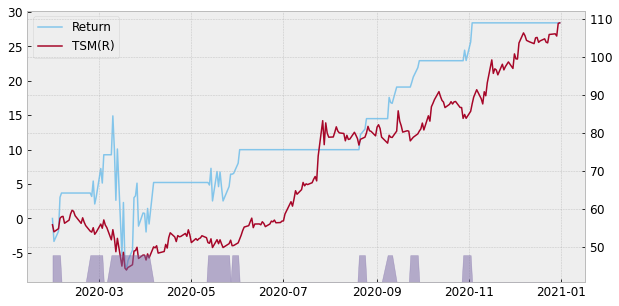

In [20]:
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [21]:
import finterstellar as fs

In [22]:
symbol = 'DAL'
df = fs.get_ohlc(symbol, start_date='2020-01-01', end_date='2020-12-31')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,40.44,39.60,40.42,39.73,"5,176,400.00",39.73
2020-12-28,40.78,40.01,40.27,40.15,"10,654,400.00",40.15
2020-12-29,40.84,39.90,40.84,40.03,"8,142,800.00",40.03
2020-12-30,40.91,39.89,40.00,40.56,"8,504,600.00",40.56
2020-12-31,40.74,39.76,40.30,40.21,"8,705,700.00",40.21


In [23]:
fs.stochastic(df, symbol, n=14, m=3, t=3)

,DAL,slow_k,slow_d
Date,,,
2020-01-02,59.04,NaN,NaN
2020-01-03,58.06,NaN,NaN
2020-01-06,57.66,NaN,NaN
2020-01-07,57.61,NaN,NaN
2020-01-08,58.85,NaN,NaN
...,...,...,...
2020-12-24,39.73,17.11,18.44
2020-12-28,40.15,25.84,20.44
2020-12-29,40.03,24.35,22.43


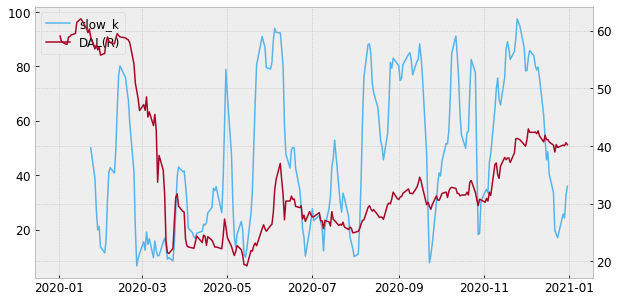

In [24]:
fs.draw_chart(df, left='slow_k', right=symbol)

CAGR: -30.16%
Accumulated return: -27.93%
Average return: -1.64%
Benchmark return : -30.05%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: -0.37
MDD: -61.71%
Benchmark MDD: -69.06%


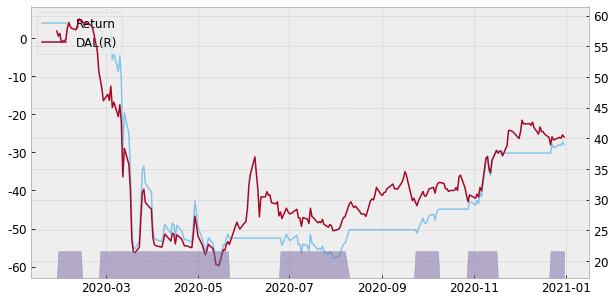

In [26]:
fs.indicator_to_signal(df, factor='slow_k', buy=20, sell=80) # stochastic-평균회귀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [28]:
df['indicator'] = df['slow_k'] - df['slow_d']
df.tail()

,DAL,slow_k,slow_d,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd,exs_rtn_daily,indicator
Date,,,,,,,,,,,,,,
2020-12-24,39.73,17.11,18.44,buy,ll,1,1.00,0.99,0.71,-28.79,0.68,0.67,-0.01,-1.33
2020-12-28,40.15,25.84,20.44,buy,ll,1,1.00,1.01,0.72,-28.04,0.69,0.68,0.01,5.40
2020-12-29,40.03,24.35,22.43,buy,ll,1,1.00,1.00,0.72,-28.26,0.68,0.67,-0.00,1.92
2020-12-30,40.56,32.62,27.60,buy,ll,1,1.00,1.01,0.73,-27.31,0.69,0.68,0.01,5.02
2020-12-31,40.21,35.93,30.97,buy,ll,1,1.00,0.99,0.72,-27.93,0.69,0.68,-0.01,4.96


CAGR: -2.96%
Accumulated return: -2.74%
Average return: 0.69%
Benchmark return : -30.05%
Number of trades: 29
Number of win: 11
Hit ratio: 37.93%
Investment period: 0.9yrs
Sharpe ratio: -0.06
MDD: -53.57%
Benchmark MDD: -67.73%


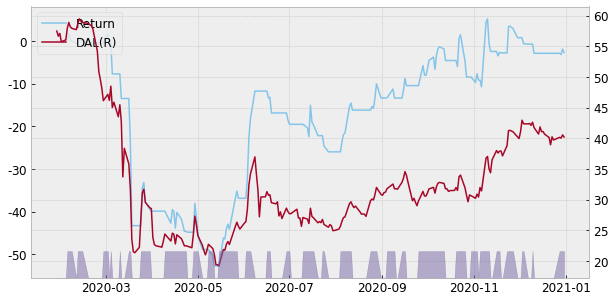

In [30]:
fs.indicator_to_signal(df, factor='indicator', buy=0, sell=0) # stochastic-모멘텀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)